In [ ]:
import pandas as pd
import pickle
import numpy as np
import os

from google.colab import files
import io
import time

!pip install -U yellowbrick
!pip install -U imbalanced-learn

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.2)
Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [ ]:
# mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

# specify base directory for files
baseDir = '/content/drive/My Drive/ETHZ/AML/Project_2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [ ]:
# Importing original data
D_X_df = pd.read_csv(baseDir + 'X_train.csv', index_col = 'id')
D_y_df = pd.read_csv(baseDir + 'y_train.csv', index_col = 'id')
D_test_df = pd.read_csv(baseDir + 'X_test.csv', index_col = 'id')

D_X_df.head(20)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x960,x961,x962,x963,x964,x965,x966,x967,x968,x969,x970,x971,x972,x973,x974,x975,x976,x977,x978,x979,x980,x981,x982,x983,x984,x985,x986,x987,x988,x989,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-1.498973,1.448201,2.784979,1.905992,1.285007,-0.571679,1.253798,-2.590709,1.379211,-1.553323,-0.564972,2.584993,0.011699,0.441804,-0.699960,1.747325,2.065368,2.787858,2.013942,-1.401352,2.147372,0.617870,2.141796,-2.781471,0.413109,2.345852,0.030399,0.887061,-1.232804,0.109728,4.319156,3.178303,0.184391,-1.243393,1.406802,3.132227,-0.215465,1.505367,-0.503517,0.270487,...,1.348220,-1.877967,-0.739429,1.566261,2.730320,-2.380653,-2.652265,0.176041,2.008110,0.240972,0.710862,-1.695216,4.116688,0.849540,0.958647,0.514287,-2.362364,0.145864,0.874874,-1.650551,-0.709709,1.894579,2.585351,1.893157,-1.464831,4.246892,-4.139556,-2.965517,3.240977,1.190587,2.638401,-1.365574,2.856497,-1.916006,1.406900,-2.581604,0.839115,-0.004883,3.173465,2.179183
1.0,-0.521470,-0.493049,0.891382,-0.080855,0.227825,-0.167394,-0.426608,0.371071,-0.065361,-0.271039,-0.074448,0.964929,1.471138,0.432700,-1.190865,0.030373,0.597827,0.996612,-0.523518,-0.668377,0.379092,-0.797149,0.194128,-0.873084,0.268315,0.130959,0.547615,0.430073,0.237003,-0.476202,-0.005975,-0.197892,-0.400580,-1.111818,-0.140526,-0.209191,1.419397,-0.518544,1.120603,-0.749909,...,-0.495387,-0.046147,-0.066997,-0.003721,-0.361316,-0.048866,-0.254264,-0.421037,0.487685,0.770651,0.280975,0.158271,-0.809737,0.652606,-0.397294,0.051201,-0.810056,0.412149,0.503858,-0.645113,0.650803,0.799408,-0.596739,-0.804695,-0.803387,0.417222,-0.041625,0.352568,1.182781,-0.090232,0.662354,-0.443464,-0.540985,-0.164082,0.223598,0.274742,-0.122392,0.971394,0.604963,0.355499
2.0,-0.417724,-0.019106,0.938377,-0.670472,0.298922,0.917788,0.189585,-0.259406,0.591056,-1.391407,0.486646,0.704700,0.844097,1.195779,-0.673821,-0.572311,0.652869,0.782490,-0.746676,-0.972831,0.533623,0.977401,0.360857,0.497896,0.353269,0.142392,0.399858,0.820036,-0.326413,0.108279,0.979080,-0.327711,0.796991,-0.678033,-0.149652,0.651686,0.436569,-0.466789,0.181601,0.901009,...,-1.041419,-1.554904,0.393147,-0.085724,0.346211,-0.719380,-1.293079,0.622270,1.113963,1.211985,0.193227,0.007382,0.704057,0.383336,-1.380809,-0.570085,-1.476090,0.026893,0.457055,-1.311419,0.961965,1.047396,0.179421,1.126904,-1.251237,0.331101,-1.254555,-0.535584,-0.015067,-0.035772,0.617464,-0.543036,-0.321695,-1.778676,1.118608,-0.937445,-0.239242,0.842709,2.086818,0.512741
3.0,-0.471972,0.000398,0.784836,1.088817,-0.436292,0.023086,0.611958,-0.720903,0.310497,-0.703081,-0.595316,0.522094,0.075199,0.997927,0.952303,-0.000920,1.353171,0.492778,-0.100945,-1.047399,0.830849,1.096135,0.571503,-1.033216,-0.796911,1.031535,0.838741,-0.000040,-0.757737,-0.538154,2.045717,1.126708,0.239202,-0.506557,-0.981757,1.753852,-0.302296,0.940582,-0.913573,0.615190,...,-0.252032,-1.374432,-0.952914,1.271367,1.055987,-1.535406,-1.647291,0.222529,1.428344,0.926888,0.582608,-0.211813,1.205523,0.536371,-0.335546,-0.458197,-0.087182,0.327218,0.070464,-0.018343,-0.014398,0.195694,1.137555,1.080092,-0.282592,1.686490,-1.047579,-1.154139,0.579924,1.122358,0.672421,-1.942345,0.366181,-1.226904,1.152494,-0.104389,0.702375,0.426496,0.336746,1.304973
4.0,0.201026,-0.579901,0.638809,-0.614121,0.468388,0.535726,0.271890,0.054270,0.297078,-0.677568,0.268948,0.202088,1.004802,0.001226,-0.521941,-0.258955,0.442525,0.543422,0.000783,-0.758873,0.082507,0.595247,-0.023682,0.520904,0.323870,0.591798,-0.032731,-0.618663,-1.044747,-0.418920,0.489303,-0.882979,0.568533,-0.337236,-0.097782,-0.371909,0.520280,-0.358214,-0.096405,-0.518626,...,-0.250465,-0.331456,-0.272372,-1.008573,-0.203979,0.105460,0.146728,-0.068328,0.018873,0.687485,-0.606792,-0.288901,0.066643,0

# Convert to np, normalize

In [ ]:
from sklearn import preprocessing

D_X = np.array(D_X_df)
D_y = np.ravel(np.array(D_y_df))
D_test = np.array(D_test_df)

scaler = preprocessing.StandardScaler()
scaler.fit_transform(D_X)

D_X_stand = scaler.transform(D_X)
D_test_stand = scaler.transform(D_test) # scaling accoring to train set - see https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i

# Resampling

In [ ]:
'''
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import TomekLinks
from yellowbrick.features import PCA
from collections import Counter

counter = Counter(D_y)
print("Before resampling: {}".format(counter))
# PCA before
classes = ['0', '1', '2']
visualiser = PCA(scale=True, projection=3, classes=classes)
visualiser.fit_transform(D_X_stand, D_y)
visualiser.show()

os = BorderlineSMOTE(random_state=0)
D_X_res, D_y_res = os.fit_resample(D_X_stand, D_y)
D_X_stand, D_y = D_X_res, D_y_res

counter = Counter(D_y)
print("After resampling: {}".format(counter))
# PCA after
visualiser = PCA(scale=True, projection=3, classes=classes)
visualiser.fit_transform(D_X_stand, D_y)
visualiser.show()
'''

'\nfrom imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE, SVMSMOTE\nfrom imblearn.under_sampling import TomekLinks\nfrom yellowbrick.features import PCA\nfrom collections import Counter\n\ncounter = Counter(D_y)\nprint("Before resampling: {}".format(counter))\n# PCA before\nclasses = [\'0\', \'1\', \'2\']\nvisualiser = PCA(scale=True, projection=3, classes=classes)\nvisualiser.fit_transform(D_X_stand, D_y)\nvisualiser.show()\n\nos = BorderlineSMOTE(random_state=0)\nD_X_res, D_y_res = os.fit_resample(D_X_stand, D_y)\nD_X_stand, D_y = D_X_res, D_y_res\n\ncounter = Counter(D_y)\nprint("After resampling: {}".format(counter))\n# PCA after\nvisualiser = PCA(scale=True, projection=3, classes=classes)\nvisualiser.fit_transform(D_X_stand, D_y)\nvisualiser.show()\n'

# Outlier detection

Before outlier removal: Counter({1: 3600, 0: 600, 2: 600})


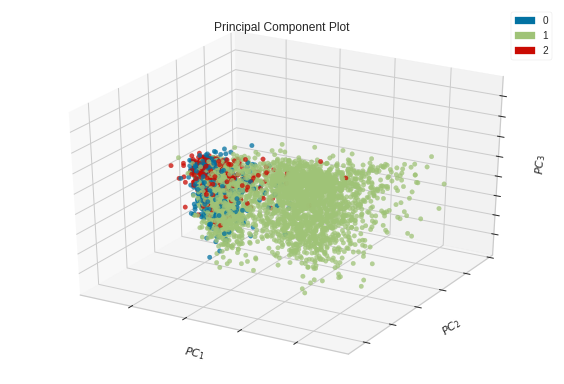

After outlier removal: Counter({1: 3188, 0: 405, 2: 395})


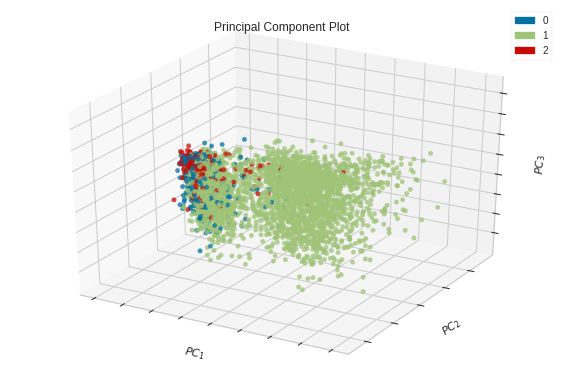

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from yellowbrick.features import PCA
from collections import Counter

counter = Counter(D_y)
print("Before outlier removal: {}".format(counter))
classes = ['0', '1', '2']
visualiser = PCA(scale=True, projection=3, classes=classes)
visualiser.fit_transform(D_X_stand, D_y)
visualiser.show()

lof = LocalOutlierFactor(n_neighbors=10)
labels = lof.fit_predict(D_X_stand)
outlier_indices = [idx for idx, label in enumerate(labels) if label == -1]

X_outliers_removed = np.delete(D_X_stand, obj=outlier_indices, axis=0)
y_outliers_removed = np.delete(D_y, obj=outlier_indices, axis=0)

D_X_stand = X_outliers_removed
D_y = y_outliers_removed

counter = Counter(D_y)
print("After outlier removal: {}".format(counter))
visualiser = PCA(scale=True, projection=3, classes=classes)
visualiser.fit_transform(D_X_stand, D_y)
visualiser.show()


# Classification

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
from scipy.stats import uniform, randint

X_train, X_test, y_train, y_test = train_test_split(D_X_stand, D_y, test_size=0.2)

svm = SVC()
params = dict(C=uniform(0, 1),
              kernel=['poly'],
              degree=randint(0, 6),
              class_weight=['balanced'])

model = RandomizedSearchCV(estimator=svm, param_distributions=params, scoring='balanced_accuracy', cv=5, n_jobs=-1, return_train_score=True)
model.fit(X_train, y_train)

print(model.cv_results_.keys())

print(model.cv_results_["mean_train_score"])
print(model.cv_results_["mean_test_score"])

print(model.best_params_)

predictions = model.predict(X_test)
score = balanced_accuracy_score(y_test, predictions)
print('Final balanced accuracy: {}'.format(score))

# Beep once training is finished
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

# Predict

In [ ]:
from sklearn.svm import SVC

model.fit(D_X_stand, D_y)

result_r = model.predict(D_test_stand)
result_r = np.transpose(np.array(result_r))

print(result_r.shape)

(4100,)


# Convert NP arrays back to Pandas dataframe

In [ ]:
D_test_df.index
D_y_df.columns

df_r = pd.DataFrame(result_r,index=D_test_df.index.astype(int))
df_out = pd.concat([df_r], axis=1, sort=False)
df_out.columns = D_y_df.columns
df_out.head()

,y
id,
0,1
1,1
2,2
3,0
4,1


# Saving dataframe

In [ ]:
import datetime
now = datetime.datetime.now()
unixTime = round(now.timestamp())

name = f'{baseDir}predictions/pred_{unixTime}.csv'
print(f'File was saved under {name}')
df_out.to_csv(name, index=True, header = True, float_format='%.3f') #, compression='zip')

File was saved under /content/drive/My Drive/ETHZ/AML/Project_2/predictions/pred_1604728918.csv
